Index(['AccidentUID', 'AccidentType', 'AccidentType_de', 'AccidentType_fr',
       'AccidentType_it', 'AccidentType_en', 'AccidentSeverityCategory',
       'AccidentSeverityCategory_de', 'AccidentSeverityCategory_fr',
       'AccidentSeverityCategory_it', 'AccidentSeverityCategory_en',
       'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle',
       'AccidentInvolvingMotorcycle', 'RoadType', 'RoadType_de', 'RoadType_fr',
       'RoadType_it', 'RoadType_en', 'AccidentLocation_CHLV95_E',
       'AccidentLocation_CHLV95_N', 'CantonCode', 'MunicipalityCode_Aktuell',
       'MunicipalityCode_AccidentYear', 'AccidentYear', 'AccidentMonth',
       'AccidentMonth_de', 'AccidentMonth_fr', 'AccidentMonth_it',
       'AccidentMonth_en', 'AccidentWeekDay', 'AccidentWeekDay_de',
       'AccidentWeekDay_fr', 'AccidentWeekDay_it', 'AccidentWeekDay_en',
       'AccidentHour', 'AccidentHour_text'],
      dtype='object')


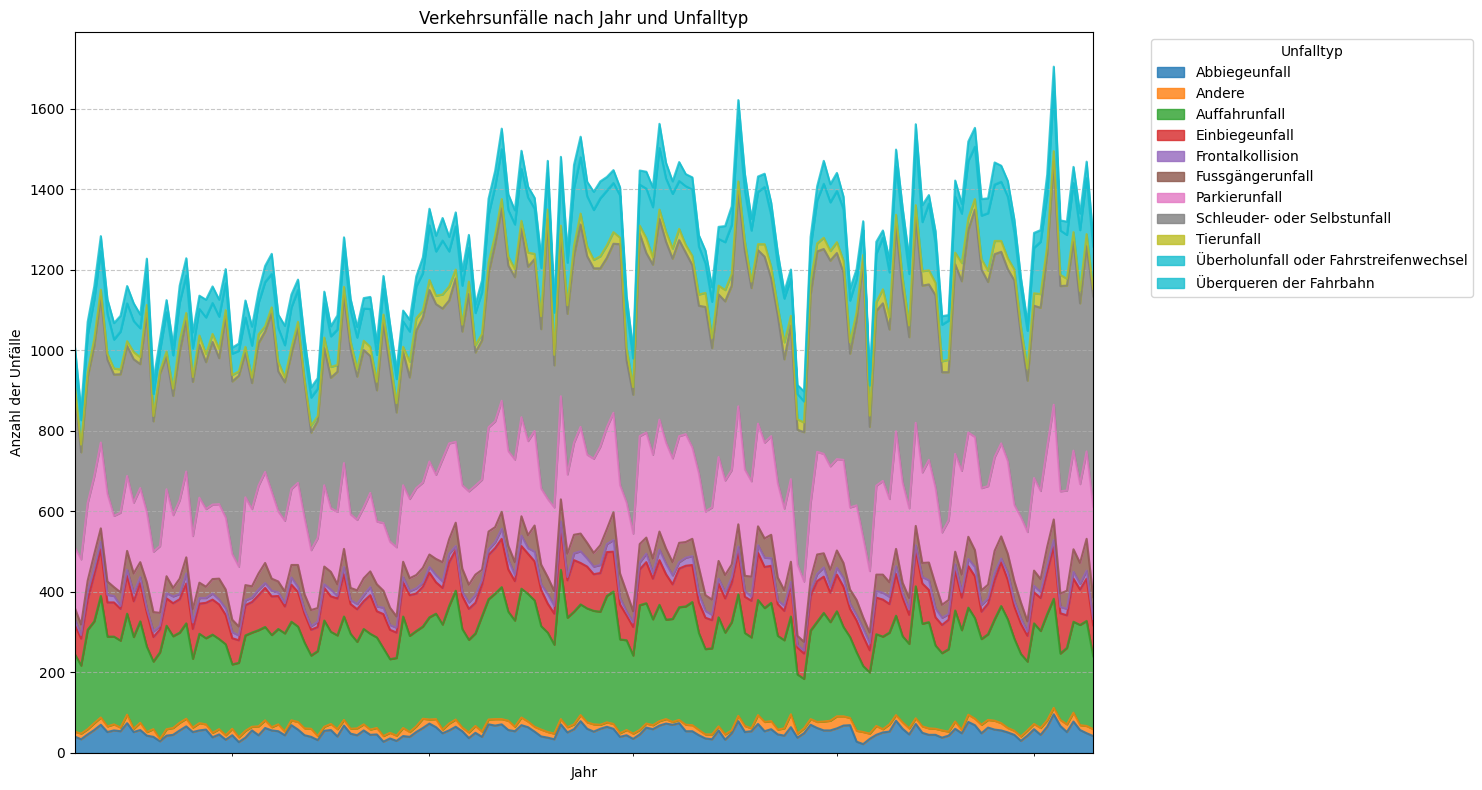

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Daten laden, mit korrektem Trennzeichen und Fehlerbehandlung
df = pd.read_csv('Data/DatenVerkehrsunfälle.csv', sep=',', encoding='utf-8')

# Prüfen, ob die relevanten Spalten vorhanden sind
print(df.columns)

# Kombiniere Jahr und Monat in ein Datum
df['AccidentYearMonth'] = pd.to_datetime(
    df['AccidentYear'].astype(str) + '-' + df['AccidentMonth'].astype(str) + '-01'
)

# Daten gruppieren: Anzahl der Unfälle nach Jahr-Monat und Unfalltyp
df_grouped = df.groupby([df['AccidentYearMonth'], 'AccidentType_de']).size().unstack(fill_value=0)

# Nach Zeitstempel sortieren
df_grouped = df_grouped.sort_index()

# Gestapeltes Flächendiagramm
ax = df_grouped.plot(kind="area", stacked=True, figsize=(15, 8), alpha=0.8, colormap="tab10")

# X-Achse formatieren
ax.xaxis.set_major_locator(mdates.YearLocator())  # Haupt-Ticks auf Jahre setzen
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Kleine Ticks für Monate
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Nur Jahr formatieren

# Optional: Ticks rotieren, damit sie besser lesbar sind
plt.xticks(rotation=45)

# Diagramm anpassen
plt.title("Verkehrsunfälle nach Jahr und Unfalltyp")
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Unfälle")
plt.legend(title="Unfalltyp", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
